# Clustering Part 2- Hierarchical Clustering

In [13]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore

In [14]:
#Importing CSV 
custData=pd.read_csv('Cust_Spend_Data.csv')
custData.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [15]:
custDataAttr=custData.iloc[:,2:]
custDataAttr.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [16]:
custDataAttr.describe()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,10.000000,10.000000,10.000000,10.0000,10.00000
mean,4850.000000,4.000000,0.300000,4.3000,4.00000
std,2877.595447,1.699673,0.483046,4.6916,3.05505
min,1000.000000,2.000000,0.000000,1.0000,0.00000
25%,2500.000000,3.000000,0.000000,1.0000,2.00000
50%,5000.000000,3.500000,0.000000,1.5000,3.50000
75%,6875.000000,5.000000,0.750000,8.2500,6.25000
max,10000.000000,7.000000,1.000000,12.0000,9.00000


In [17]:
custDataScaled=custDataAttr.apply(zscore)
custDataScaled

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


## Statistical Plots

PairPlot

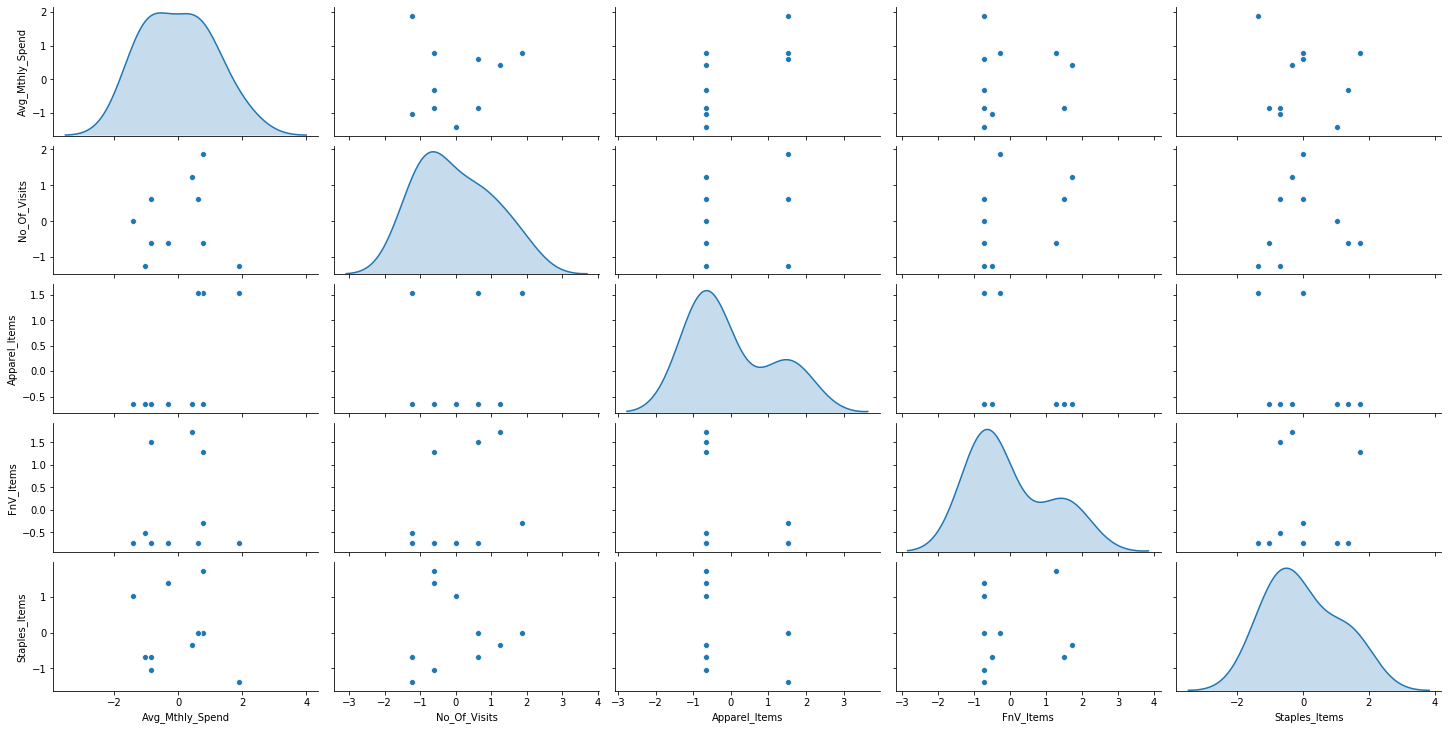

In [28]:
sns.pairplot(custDataScaled,height=2,aspect=2,diag_kind='kde')

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [43]:
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')

In [44]:
model.fit(custDataScaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [45]:
custDataAttr['labels']=model.labels_
custDataAttr.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [46]:
custDataClust=custDataAttr.groupby(['labels'])

In [47]:
custDataClust.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [52]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [53]:
from scipy.spatial.distance import pdist

In [54]:
z=linkage(custDataScaled,metric='euclidean',method='average')
c,coph_dists=cophenet(z,pdist(custDataScaled))
c

0.8681149436293064

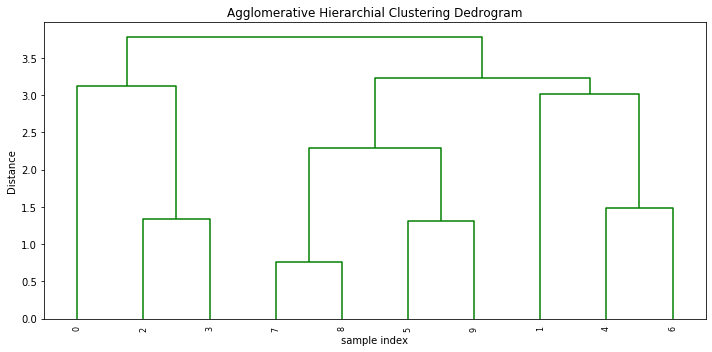

In [55]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchial Clustering Dedrogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z,leaf_rotation=90.,color_threshold=40, leaf_font_size=8.)
plt.tight_layout()

In [56]:
z=linkage(custDataScaled,metric='euclidean',method='complete')
c,coph_dists=cophenet(z,pdist(custDataScaled))
c

0.8606955190809153

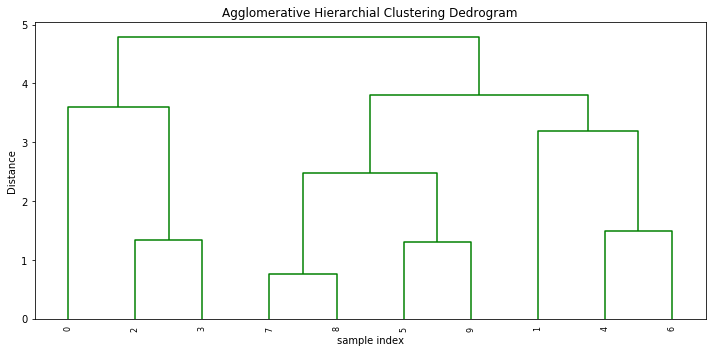

In [57]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchial Clustering Dedrogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z,leaf_rotation=90.,color_threshold=40, leaf_font_size=8.)
plt.tight_layout()

In [58]:
z=linkage(custDataScaled,metric='euclidean',method='ward')
c,coph_dists=cophenet(z,pdist(custDataScaled))
c

0.8453818941339526

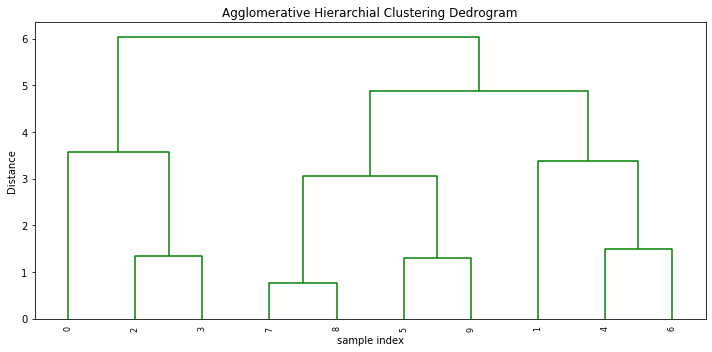

In [59]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchial Clustering Dedrogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z,leaf_rotation=90.,color_threshold=40, leaf_font_size=8.)
plt.tight_layout()